c:\Users\Miha\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


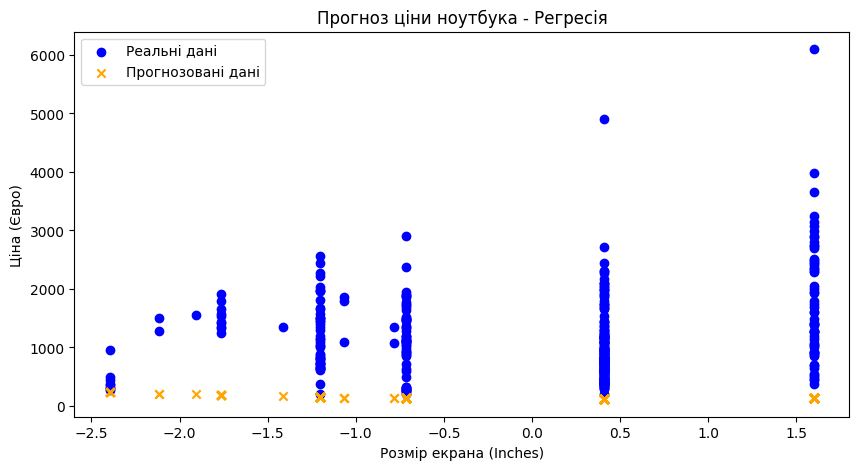

c:\Users\Miha\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
MSE для регресії: 1589640.6716302203
Точність класифікації: 0.5754475703324808
Звіт по класифікації:
               precision    recall  f1-score   support

           0       0.54      0.92      0.68       194
           1       0.75      0.23      0.36       197

    accuracy                           0.58       391
   macro avg       0.65      0.58      0.52       391
weighted avg       0.65      0.58      0.52       391



In [16]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_squared_error, accuracy_score, classification_report
import matplotlib.pyplot as plt

# Встановлення seed для відтворюваності
np.random.seed(42)
tf.random.set_seed(42)

# Спроба прочитати CSV-файл з іншим кодуванням
laptop_price_data = pd.read_csv("c:/Users/Miha/source/repos/Питон/Лаб 7 (Інтелектуальний аналіз даних)/laptop_price.csv", encoding='ISO-8859-1')

# Відображення перших кількох рядків і зведеної інформації про дані
laptop_price_data.head(), laptop_price_data.describe()

# Попередня обробка даних
# Вибір ознак та цільової змінної для регресії
features = laptop_price_data[['Inches']]  # Використання "Inches" як предиктора для простоти
target = laptop_price_data['Price_euros']

# Стандартизація ознак
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Розбиття на навчальний та тестовий набори для задачі регресії
X_reg_train, X_reg_test, y_reg_train, y_reg_test = train_test_split(features_scaled, target, test_size=0.3, random_state=42)

# 1. Модель регресії
# Визначення та компіляція моделі регресії
reg_model = Sequential([
    Dense(10, input_dim=features_scaled.shape[1], activation="relu"),
    Dense(1)  # Вихідний шар для регресії
])
reg_model.compile(optimizer="adam", loss="mse", metrics=["mae"])

# Навчання моделі регресії
reg_model.fit(X_reg_train, y_reg_train, epochs=100, verbose=0)

# Прогнозування та оцінка моделі регресії
y_reg_pred = reg_model.predict(X_reg_test)
mse_reg = mean_squared_error(y_reg_test, y_reg_pred)

# Візуалізація результатів для регресії
plt.figure(figsize=(10, 5))
plt.scatter(X_reg_test, y_reg_test, color='blue', label='Реальні дані')
plt.scatter(X_reg_test, y_reg_pred, color='orange', label='Прогнозовані дані', marker='x')
plt.xlabel("Розмір екрана (Inches)")
plt.ylabel("Ціна (Євро)")
plt.title("Прогноз ціни ноутбука - Регресія")
plt.legend()
plt.show()

# 2. Модель класифікації
# Визначення бінарної класифікації за ціною (наприклад, висока/низька ціна на основі медіани)
price_median = target.median()
y_clf = (target > price_median).astype(int)  # 1 для високої ціни, 0 для низької

# Розбиття на навчальний та тестовий набори для задачі класифікації
X_clf_train, X_clf_test, y_clf_train, y_clf_test = train_test_split(features_scaled, y_clf, test_size=0.3, random_state=42)

# Визначення та компіляція моделі класифікації
clf_model = Sequential([
    Dense(10, input_dim=features_scaled.shape[1], activation="relu"),
    Dense(5, activation="relu"),
    Dense(1, activation="sigmoid")  # Вихідний шар для бінарної класифікації
])
clf_model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

# Навчання моделі класифікації
clf_model.fit(X_clf_train, y_clf_train, epochs=50, verbose=0)

# Прогнозування та оцінка моделі класифікації
y_clf_pred_prob = clf_model.predict(X_clf_test)
y_clf_pred = (y_clf_pred_prob > 0.5).astype(int)

# Точність класифікації та звіт
accuracy_clf = accuracy_score(y_clf_test, y_clf_pred)
clf_report = classification_report(y_clf_test, y_clf_pred)

# Виведення результатів оцінки
print("MSE для регресії:", mse_reg)
print("Точність класифікації:", accuracy_clf)
print("Звіт по класифікації:\n", clf_report)

